# Preprocesamiento de Imagens 

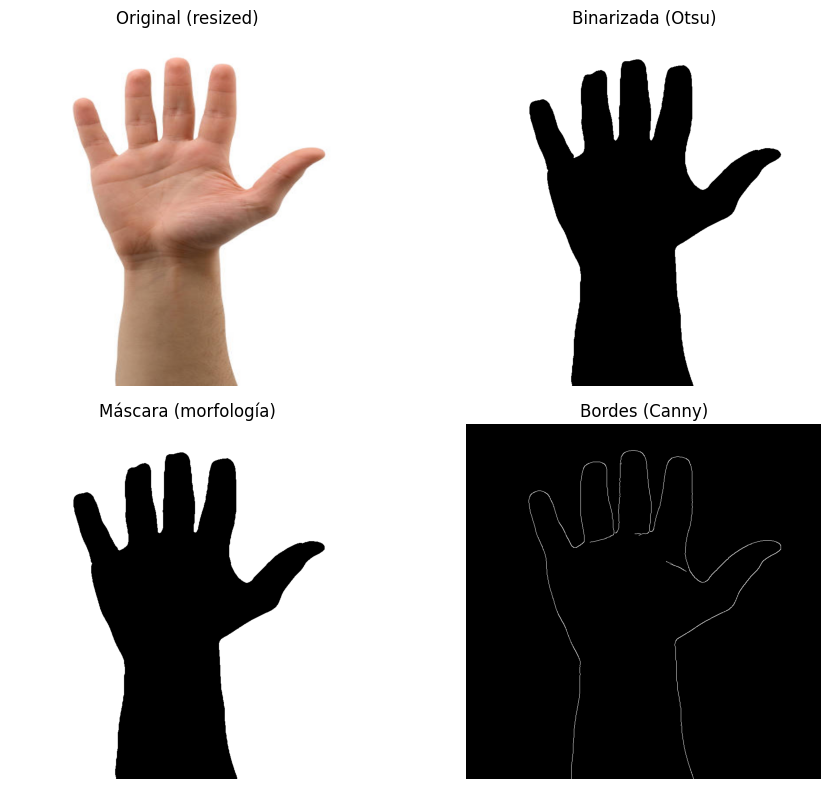

Guardado: data/procesadas\mano-abierta_mask.png, data/procesadas\mano-abierta_masked.png, data/procesadas\mano-abierta_edges.png


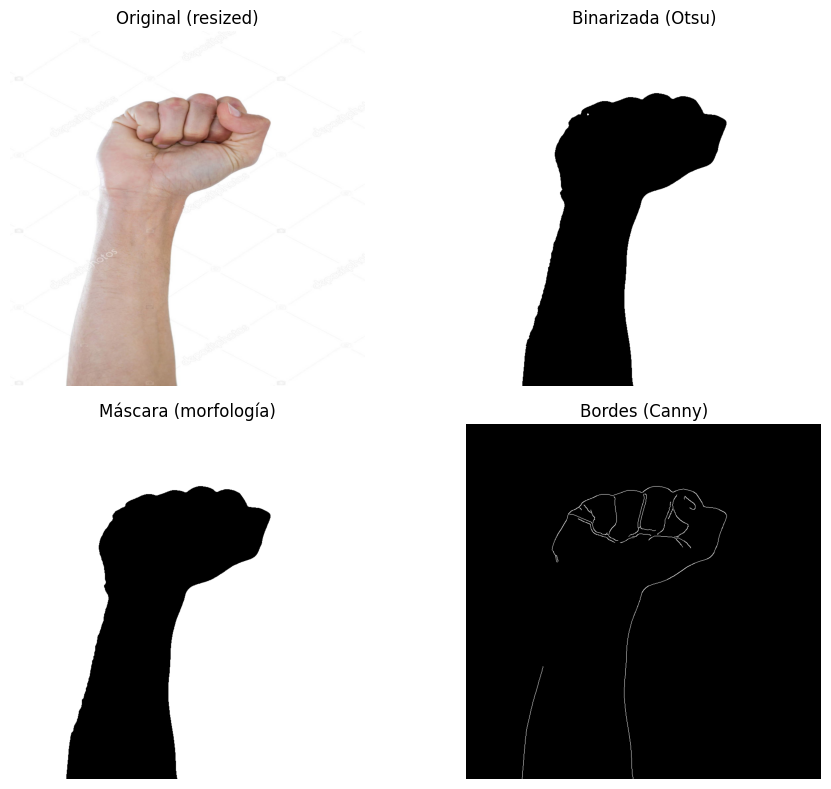

Guardado: data/procesadas\mano-cerrada_mask.png, data/procesadas\mano-cerrada_masked.png, data/procesadas\mano-cerrada_edges.png
Pipeline completado. Todas las imágenes procesadas con tamaño: (800, 800)


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Parámetros
TARGET_SIZE = (800, 800)   # ambas imágenes quedarán de este tamaño (ancho, alto)
CANNY_THRESH1 = 50
CANNY_THRESH2 = 150
MEDIAN_KSIZE = 7          # debe ser impar >=3
MORPH_KERNEL = (7, 7)

# Rutas y lista
os.makedirs('data/procesadas', exist_ok=True)
imagenes = ['data/inputs/mano-abierta.jpg', 'data/inputs/mano-cerrada.jpg']

for imagen in imagenes:
    img = cv2.imread(imagen)
    if img is None:
        print(f"No se pudo leer la imagen '{imagen}'")
        continue

    # 0) Redimensionar para que todas queden igual
    img_resized = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)

    # 1) Gris
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # 2) Filtro de mediana para ruido sal/pimienta
    median = cv2.medianBlur(gray, MEDIAN_KSIZE)

    # 3) Binarización Otsu (sobre la imagen filtrada)
    _, binarizada = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 4) Morfología para limpiar la máscara
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, MORPH_KERNEL)
    img_morph = cv2.morphologyEx(binarizada, cv2.MORPH_CLOSE, kernel, iterations=2)
    img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_OPEN, kernel, iterations=1)
    img_morph = (img_morph > 0).astype('uint8') * 255  # asegurar 0/255 uint8

    # 5) Canny (bordes) - aplicamos sobre la imagen suavizada (median)
    edges = cv2.Canny(median, CANNY_THRESH1, CANNY_THRESH2)

   

    # 7) Visualización ordenada (2x2)
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.title('Original (resized)')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 2, 2)
    plt.title('Binarizada (Otsu)')
    plt.axis('off')
    plt.imshow(binarizada, cmap='gray')

    plt.subplot(2, 2, 3)
    plt.title('Máscara (morfología)')
    plt.axis('off')
    plt.imshow(img_morph, cmap='gray')

    plt.subplot(2, 2, 4)
    plt.title('Bordes (Canny)')
    plt.axis('off')
    plt.imshow(edges, cmap='gray')

    plt.tight_layout()
    plt.show()

    # 8) Guardar resultados (mask, masked color y edges)
    base = os.path.splitext(os.path.basename(imagen))[0]
    mask_path = os.path.join('data/procesadas', f"{base}_mask.png")
    masked_color_path = os.path.join('data/procesadas', f"{base}_masked.png")
    edges_path = os.path.join('data/procesadas', f"{base}_edges.png")

    cv2.imwrite(mask_path, img_morph)                       # máscara 0/255
    cv2.imwrite(masked_color_path, masked_color)           # BGR guardado
    cv2.imwrite(edges_path, edges)                         # bordes

    print(f"Guardado: {mask_path}, {masked_color_path}, {edges_path}")

# Confirmación final: ambas imágenes procesadas tienen tamaño TARGET_SIZE.
print("Pipeline completado. Todas las imágenes procesadas con tamaño:", TARGET_SIZE)